# Face Detection
Artificial Intelligence and Machine Learning 1

Submission date/time: __07 April 2022, 3PM__


---





## Step 1: Import Machine Learning Libraries

In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from skimage import data,color,feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score

from itertools import chain

## Step 2: Data Preparation

First, I made sure to mount my google drive to this project and load in the positive and negative data set files that were given.

The dataset has __13233__ positive data and __30000__ negative data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
positive_patches = np.load('/content/drive/MyDrive/AI/Assessment/positive_patches.npy')
negative_patches = np.load('/content/drive/MyDrive/AI/Assessment/negative_patches.npy')

The data sets consisted of raw patches (1-D 2914 pixels per picture) which were then reshaped to 2-D 62x47 image patches.

To display some of the samples, I used subplots. 10 positive images and 60 negative images.

In [4]:
# Reshaped the positive datasets.

positive_reshaped = positive_patches.reshape(13233,62,47)
positive_patches.shape

(13233, 2914)

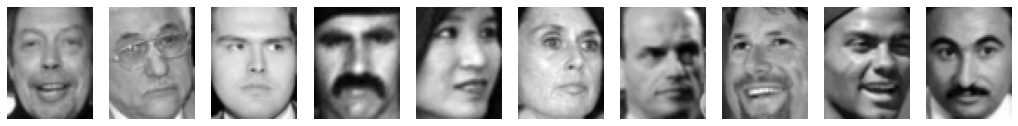

In [5]:
# Display the positive datasets.
fig, axes = plt.subplots(1,10,figsize=(18,18))

for i in range(10):
  axes[i].imshow(positive_reshaped[i],cmap='gray')
  axes[i].axis('off')

In [6]:
# Reshaped the negative datasets.

negative_reshaped = negative_patches.reshape(30000,62,47)
negative_patches.shape

(30000, 2914)

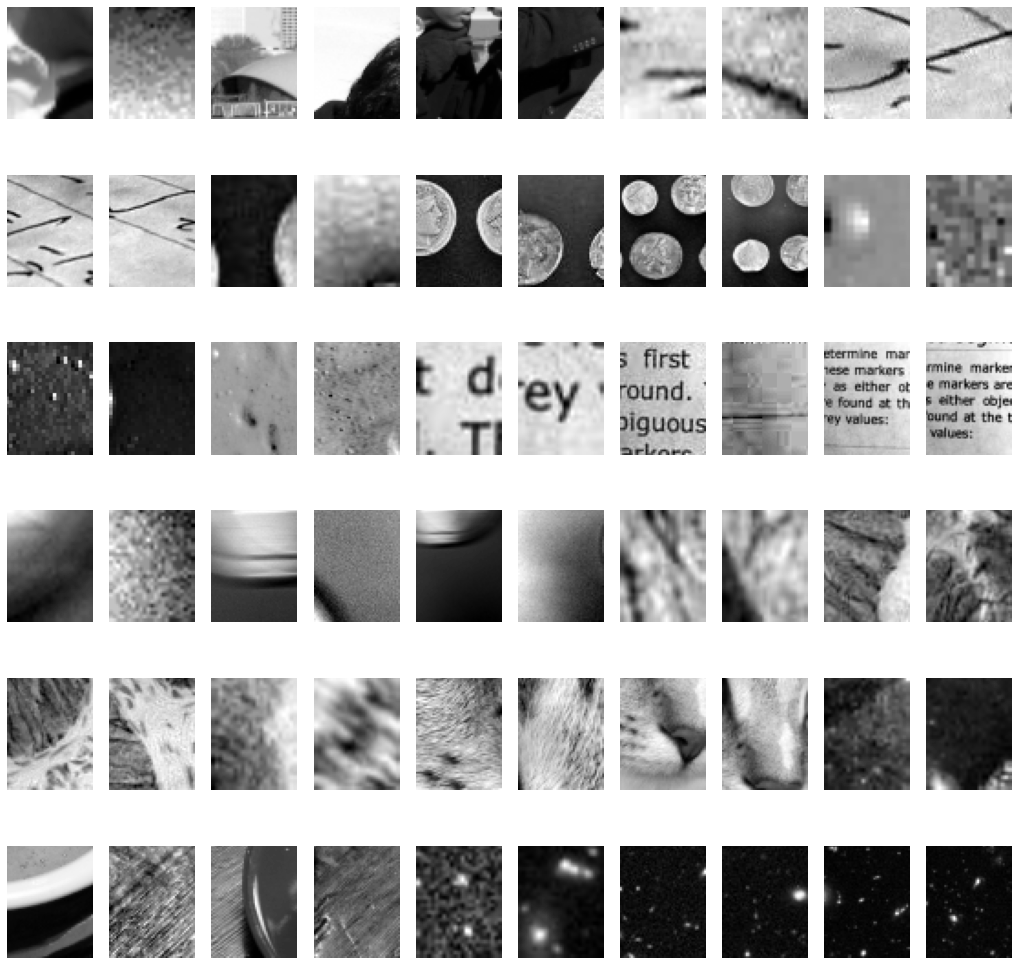

In [7]:
# Display the negative datasets

fig, ax = plt.subplots(6,10,figsize=(18,18))

for i, axi in enumerate(ax.flat):
  axi.imshow(negative_reshaped[500 * i],cmap='gray')
  axi.axis('off')

## Step 3: Feature Extraction and Binary Labels

The next step in the process is feature extraction. This is important because it increases the accuracy of models by extracting features, such as colour, shape and textures from the input data. A negative aspect of this step is that it increases the training speed. To prevent the model from overfitting and to accurately evaluate the model, I made sure to split the data into training and testing samples with a 70-30 ratio.

I also included a grayscale and a RGB histogram to describe the image feature colour distribution.

In [8]:
X = np.array([feature.hog(im) for im in chain(positive_reshaped,negative_reshaped)])
y = np.zeros(X.shape[0])
y[:positive_reshaped.shape[0]] = 1

In [9]:
print('X: ', X)
print('y: ', y)

X:  [[0.25548458 0.29600387 0.07282983 ... 0.03964323 0.04323808 0.08991418]
 [0.06110074 0.02669912 0.13924529 ... 0.07784682 0.05735707 0.17604994]
 [0.26090473 0.26090473 0.0086068  ... 0.0026164  0.0055565  0.00378414]
 ...
 [0.0641823  0.02415647 0.04330033 ... 0.02380287 0.05790631 0.03625628]
 [0.0909658  0.06683258 0.03511058 ... 0.00877273 0.02958801 0.04746254]
 [0.11721843 0.00336082 0.02127176 ... 0.00116097 0.00191511 0.01836849]]
y:  [1. 1. 1. ... 0. 0. 0.]


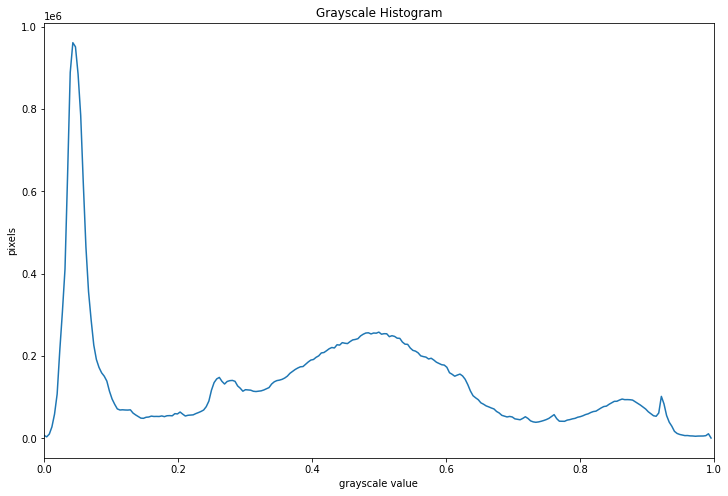

[  7315   3849  10524  28134  59045 107797 213082 306552 411158 641977
 888462 960773 950747 884467 784451 618755 464744 356312 287199 226759
 191708 172420 159332 151148 139184 114659  95767  82830  71721  69034
  69547  69057  68867  69457  61622  57112  53322  49295  48835  51405
  51969  54186  53321  53475  53264  54634  52889  55070  55381  54962
  60170  59497  64103  59018  54411  56189  56804  57258  60257  62742
  65523  68948  77130  90641 117161 135540 144497 148160 138647 132093
 138319 140289 140858 138656 127501 121906 114642 118350 117738 117166
 114546 113881 114726 115540 117615 120539 123428 132094 137473 140408
 141578 143491 146657 151185 158093 162633 167382 171004 173915 174529
 180246 185689 190259 191683 196940 200489 207576 208590 212978 217733
 220769 219629 227430 226599 232553 231129 230283 235181 239182 240326
 242209 248883 252948 255920 256478 253678 255916 255520 258113 253049
 254304 254085 247079 249382 247725 243415 242956 233971 228847 228440
 21954

In [10]:
# Create the grayscale histogram
histogram, bin_edges = np.histogram(negative_reshaped, bins=256, range=(0, 1))

# Configure and draw the figure
plt.figure(figsize=(12,8))
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])

plt.plot(bin_edges[0:-1], histogram)
plt.show()
print(histogram)

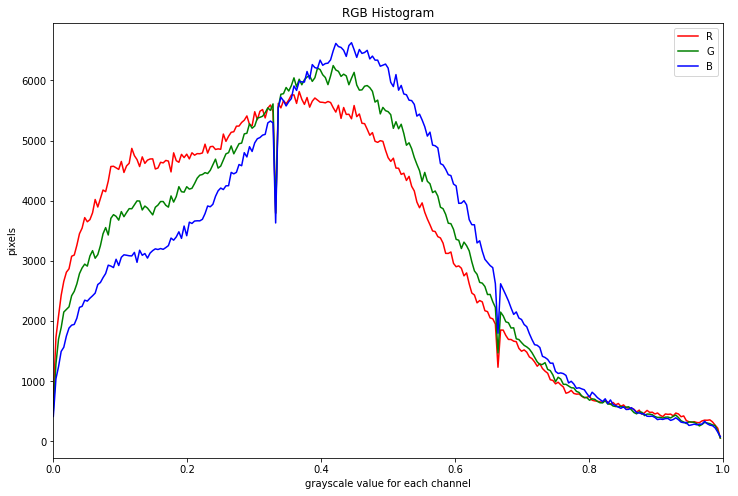

In [11]:
# RGB colour histogram
histogram_r, bin_edges_r = np.histogram(positive_reshaped[:,:,0]/255, bins=256, range=(0, 1))
histogram_g, bin_edges_g = np.histogram(positive_reshaped[:,:,1]/255, bins=256, range=(0, 1))
histogram_b, bin_edges_b = np.histogram(positive_reshaped[:,:,2]/255, bins=256, range=(0, 1))

# Configure and draw the histogram 
plt.figure(figsize=(12,8))
plt.title("RGB Histogram")
plt.xlabel("grayscale value for each channel")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0]) 

plt.plot(bin_edges_r[0:-1], histogram_r,c='r',label='R')
plt.plot(bin_edges_g[0:-1], histogram_g,c='g',label='G')
plt.plot(bin_edges_b[0:-1], histogram_b,c='b',label='B')
plt.legend(loc ='best')
plt.show()

(-0.5, 46.5, 61.5, -0.5)

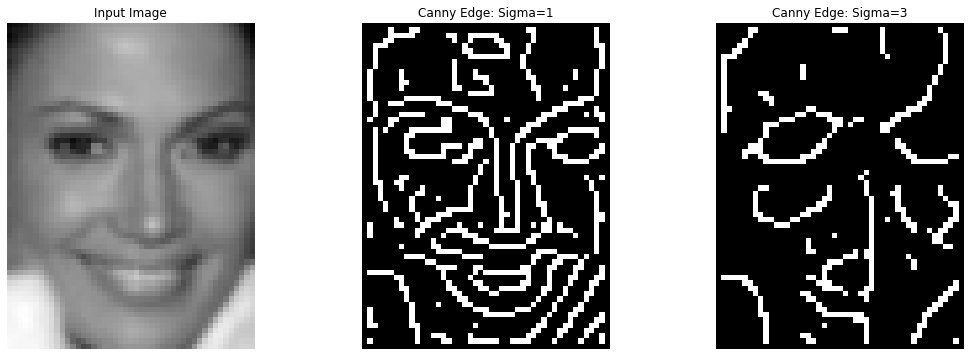

In [12]:
# Image Edges, Canny filter

edges1 = feature.canny(positive_reshaped[100])
edges2 = feature.canny(positive_reshaped[100], sigma=3)
fig,ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(positive_reshaped[100],cmap='gray')
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(edges1,cmap='gray')
ax[1].set_title('Canny Edge: Sigma=1')
ax[1].axis('off')
ax[2].imshow(edges2,cmap='gray')
ax[2].set_title('Canny Edge: Sigma=3')
ax[2].axis('off')

(-0.5, 46.5, 61.5, -0.5)

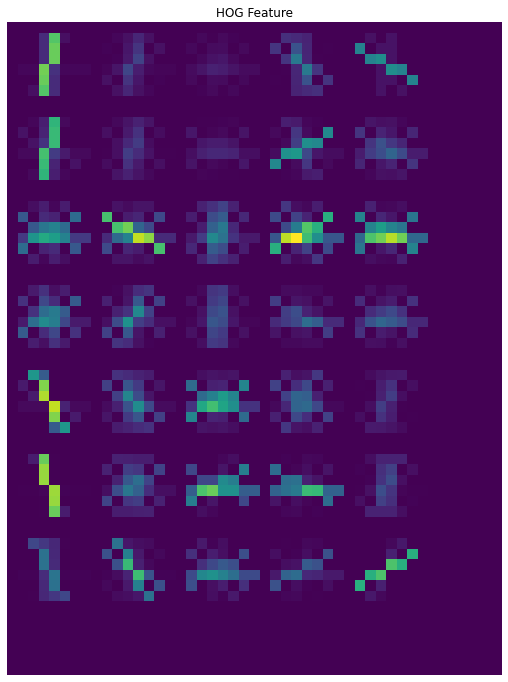

In [13]:
hog_vec, hog_vis = feature.hog(positive_reshaped[10],visualize=True)
fig,ax = plt.subplots(figsize=(12,12))
ax.imshow(hog_vis)
ax.set_title('HOG Feature')
ax.axis('off')

## Step 4: Train Your Binary Classification ML Algorithm(s)
* Split the training and test set.
* Use machine learning algorithms to create a classifier.
* Save the trained models

In [14]:
# Train-Test dataset split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

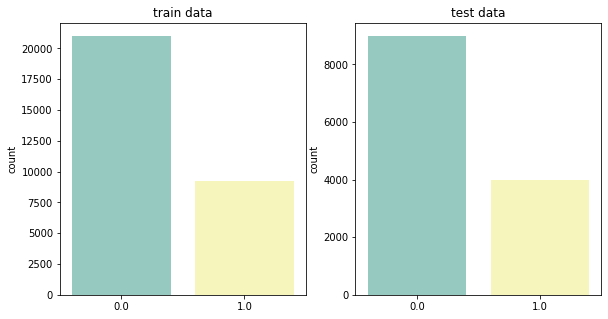

In [15]:
plt.figure(1, figsize = (15 ,5))
i = 0 
for j , k in zip([y_train , y_test], ['train data', 'test data']):
    i += 1
    plt.subplot(1, 3, i)
    sns.countplot(x = j, palette="Set3")
    plt.title(k)
plt.show()

In [16]:
print('Train data shape {}. \nTest data shape {}.'.format(X_train.shape, X_test.shape))

Train data shape (30263, 1215). 
Test data shape (12970, 1215).


Before the last step, which is executing the algorithms and evaluating the results, I made sure to pre-process the data by scaling it. The Machine Learning algorithms I used in this project are are K-Nearest Neighbours, Support Vector Machines and Decision Tree.

In [17]:
# Scale the data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* __K-Nearest Neighbours:__

In [19]:
knn = KNeighborsClassifier()

face_detector_clf1 = knn.fit(X_train, y_train)

train_acc1 = face_detector_clf1.score(X_train, y_train)*100
test_acc1 = face_detector_clf1.score(X_test, y_test)*100

print('Accuracy of K-NN classifier on training set: {:.3f}%'
     .format(train_acc1))
print('Accuracy of K-NN classifier on test set: {:.3f}%'
     .format(test_acc1))

Accuracy of K-NN classifier on training set: 99.666%
Accuracy of K-NN classifier on test set: 99.530%


In [20]:
knn = KNeighborsClassifier()

face_detector_clf1_s = knn.fit(X_train_scaled, y_train)

cross_val_knn = cross_val_score(face_detector_clf1_s, X_test_scaled,y_test,cv=5)
print('cross validation: ', cross_val_knn)

train_acc1_s = face_detector_clf1_s.score(X_train_scaled, y_train)*100
test_acc1_s = face_detector_clf1_s.score(X_test_scaled, y_test)*100

print('Accuracy of K-NN classifier (scaled) on training set: {:.3f}%'
     .format(train_acc1_s))
print('Accuracy of K-NN classifier (scaled) on test set: {:.3f}%'
     .format(test_acc1_s))

cross validation:  [0.99460293 0.99575944 0.9922899  0.99190439 0.99383192]
Accuracy of K-NN classifier (scaled) on training set: 99.696%
Accuracy of K-NN classifier (scaled) on test set: 99.568%


In [21]:
with open('/content/drive/MyDrive/AI/Assessment/trained_model_knn.pickle', 'wb') as handle:
  pickle.dump(face_detector_clf1_s, handle)

In [22]:
with open('/content/drive/MyDrive/AI/Assessment/trained_model_knn.pickle', 'rb') as handle:
  saved_face_detector_knn = pickle.load(handle)

* __Support Vector Machines:__

In [27]:
svm = SVC()
face_detector_clf2 = svm.fit(X_train, y_train)

train_acc2 = face_detector_clf2.score(X_train, y_train)*100
test_acc2 = face_detector_clf2.score(X_test, y_test)*100

print('Accuracy of SVM classifier on training set: {:.3f}%'
     .format(train_acc2))
print('Accuracy of SVM classifier on test set: {:.3f}%'
     .format(test_acc2))

Accuracy of SVM classifier on training set: 99.934%
Accuracy of SVM classifier on test set: 99.661%


In [28]:
svm = SVC(probability=True)
face_detector_clf2_s = svm.fit(X_train_scaled, y_train)

cross_val_svm = cross_val_score(face_detector_clf2_s, X_test_scaled,y_test,cv=5)
print('cross validation: ', cross_val_svm)

train_acc2_s = face_detector_clf2_s.score(X_train_scaled, y_train)*100
test_acc2_s = face_detector_clf2_s.score(X_test_scaled, y_test)*100

print('Accuracy of SVM classifier (scaled) on training set: {:.3f}%'
     .format(train_acc2_s))
print('Accuracy of SVM classifier (scaled) on test set: {:.3f}%'
     .format(test_acc2_s))

cross validation:  [0.99421742 0.99807247 0.99498843 0.99537394 0.99344641]
Accuracy of SVM classifier (scaled) on training set: 99.934%
Accuracy of SVM classifier (scaled) on test set: 99.661%


In [29]:
with open('/content/drive/MyDrive/AI/Assessment/trained_model_svm.pickle', 'wb') as handle:
  pickle.dump(face_detector_clf2_s, handle)

In [30]:
with open('/content/drive/MyDrive/AI/Assessment/trained_model_svm.pickle', 'rb') as handle:
  saved_face_detector_svm = pickle.load(handle)

* __Decision Tree:__

In [55]:
tree = DecisionTreeClassifier()
face_detector_clf3 = tree.fit(X_train,y_train)

train_acc3 = face_detector_clf3.score(X_train, y_train)*100
test_acc3 = face_detector_clf3.score(X_test, y_test)*100

print('Accuracy of Decision Tree classifier on training set: {:.3f}%'
     .format(train_acc3))
print('Accuracy of Decision Tree classifier on test set: {:.3f}%'
     .format(test_acc3))

Accuracy of Decision Tree classifier on training set: 100.000%
Accuracy of Decision Tree classifier on test set: 94.588%


In [56]:
tree = DecisionTreeClassifier()
face_detector_clf3_s = tree.fit(X_train_scaled,y_train)

cross_val_tree = cross_val_score(face_detector_clf3_s, X_test_scaled,y_test,cv=5)
print('cross validation: ', cross_val_tree)

train_acc3_s = face_detector_clf3_s.score(X_train_scaled, y_train)*100
test_acc3_s = face_detector_clf3_s.score(X_test_scaled, y_test)*100

print('Accuracy of Decision Tree classifier (scaled) on training set: {:.3f}%'
     .format(train_acc3_s))
print('Accuracy of Decision Tree classifier (scaled) on test set: {:.3f}%'
     .format(test_acc3_s))

cross validation:  [0.92791056 0.92482652 0.92713955 0.92945258 0.91711642]
Accuracy of Decision Tree classifier (scaled) on training set: 100.000%
Accuracy of Decision Tree classifier (scaled) on test set: 94.534%


In [31]:
with open('/content/drive/MyDrive/AI/Assessment/trained_model_tree.pickle', 'wb') as handle:
  pickle.dump(face_detector_clf3_s, handle)

In [32]:
with open('/content/drive/MyDrive/AI/Assessment/trained_model_tree.pickle', 'rb') as handle:
  saved_face_detector_tree = pickle.load(handle)

## Step 5: Performance Validation

* __K Nearest Neighbors:__

In [44]:
y_score_knn = knn.predict_proba(X_test_scaled)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score_knn)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score_knn))

roc_auc_score for KNN:  0.997702011585179


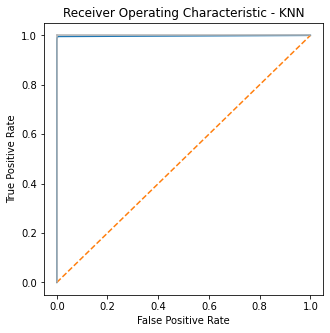

In [45]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix: 
 [[8980    6]
 [  50 3934]]

heatmap:


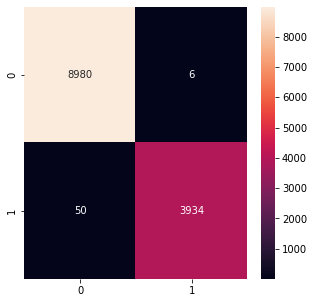

In [47]:
predictions_knn = saved_face_detector_knn.predict(X_test_scaled)
conf_mx_knn = confusion_matrix(y_test, predictions_knn)

print("Confusion Matrix: \n", conf_mx_knn)
print()
print("heatmap:")

#Heatmap
f,ax=plt.subplots(figsize=(5,5))
knn_heatmap =sns.heatmap(conf_mx_knn,annot=True,fmt='.0f')

* __Support Vector Machines:__

In [49]:
y_score_svm = svm.predict_proba(X_test_scaled)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score_svm)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score_svm))

roc_auc_score for SVM:  0.9997751969373152


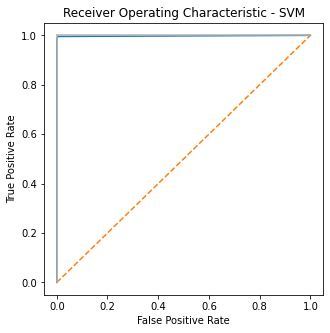

In [50]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix: 
 [[8980    6]
 [  38 3946]]

heatmap:


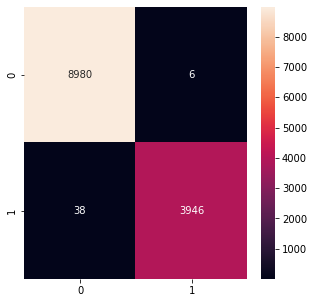

In [51]:
predictions_svm = saved_face_detector_svm.predict(X_test_scaled)
conf_mx_svm = confusion_matrix(y_test, predictions_svm)

print("Confusion Matrix: \n", conf_mx_svm)
print()
print("heatmap:")

#Heatmap
f,ax=plt.subplots(figsize=(5,5))
svm_heatmap =sns.heatmap(conf_mx_svm,annot=True,fmt='.0f')

* __Decision Tree:__

In [52]:
y_score_tree = tree.predict_proba(X_test_scaled)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score_tree)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score_tree))

roc_auc_score for DecisionTree:  0.9350663280766065


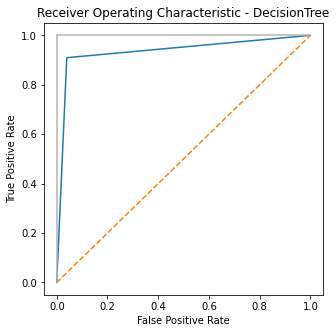

In [53]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix: 
 [[8631  355]
 [ 360 3624]]

heatmap:


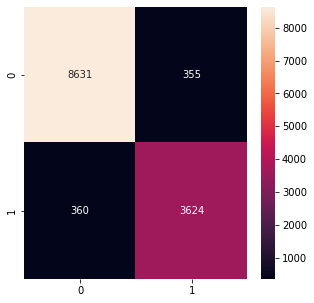

In [54]:
predictions_tree = saved_face_detector_tree.predict(X_test_scaled)
conf_mx_tree = confusion_matrix(y_test, predictions_tree)

print("Confusion Matrix: \n", conf_mx_tree)
print()
print("heatmap:")

#Heatmap
f,ax=plt.subplots(figsize=(5,5))
tree_heatmap =sns.heatmap(conf_mx_tree,annot=True,fmt='.0f')

**RESULT ANALYSIS**
---

__K-Nearest Neighbours__

K-Nearest Neighbours calculate the distance between all the training points and the test data. Then, it selects the number of points which is the closest to the test data. It can be used for classification because it’s useful for solving problems which depend on identifying similar objects. So, in this case identifying a face or no face.
<br><br>
Accuracy of K-NN classifier on training set is **99.696**%. <br>
Accuracy of K-NN classifier on test set is **99.568**%.
<br><br>
To check how many predictions were correct, I used a confusion matrix. It shows that 8980 (TP) positive class data points were correctly classified, and 6 (FP) negative class data points were incorrectly classified as positives. 50 (FN) positive class data points were incorrectly classified as negatives and 3934 (TN) negative class data points were correctly identified.

<br>

__Support Vector Machines__

Support Vector Machines find a hyperplane in an N-dimensional space that distinctly classifies the data points. This is one of the first choices for image classification tasks, because the accuracy is significant while using less computational power. It’s also useful when the training data is very large, as the datasets provided for this assignment. Another advantage is that maximising the margin distance provides some reinforcement, so that future data points can be classified with more confidence.
<br><br>
Accuracy of SVM classifier on training set is **99.934**%. <br> 
Accuracy of SVM classifier on test set is **99.661**%.
<br><br>
The confusion matrix shows that 8980 (TP) positive class data points were correctly classified, and 6 (FP) negative class data points were incorrectly classified as positives. 38 (FN) positive class data points were incorrectly classified as negatives and 3946 (TN) negative class data points were correctly identified.

<br>

__Decision Tree__

I have tried a decision tree because they are reliable and easy to interpret in image classification. The leaves represent class labels, and the branches produce a value based on an if-then rule.
<br><br>
Accuracy of decision tree classifier on training set is **100**%.<br>
Accuracy of decision tree classifier on test set is **94.534**%.
<br><br>
The confusion matrix shows that 8643 (TP) positive class data points were correctly classified, and 343 (FP) negative class data points were incorrectly classified as positives. 337 (FN) positive class data points were incorrectly classified as negatives and 3647 (TN) negative class data points were correctly identified.
<br><br>
To check the accuracy, I used the following formula: (TP+TN)/(TP+FN+FP+TN) 

<br>

__Conclusion__

The results show that the Support Vector Machines model is the most accurate out of the three. The decision tree is the least accurate one. This is also what I expected as decision trees aren’t mostly used for binary classifications, unlike SVM which most of the times is one of the better options.

To show the performance of all three classification models, I used an ROC (Receiver Operating Curve). It plots two parameters, the true positive rate (recall) and the false positive rate. To compute the points in an ROC, I used an algorithm called AUC (Area Under Curve). With this, we can see if the model ranks a positive example more highly than a negative example. The ROC confirmed the expected results.

<br>

__Convolutional Neural Networks__

After some additional research about classification models, I wanted to try and implement a CNN (Convolutional Neural Network) algorithm, which is a deep learning model, instead of a machine learning one. Neural Networks consist of units (neurons), arranged in layers which convert an input vector into output. Each unit takes an input, applies a function to it and then passes the output to the next layer. This is used in function representation and pattern recognition but is also a very good classifier for image classification. The reason I chose CNN instead of just NN is because its main advantage is that it detects the important features without any human supervision. It also has a very high features compatibility.

## Extra Task


**Has been included in the steps above:**

* more than 1 algorithm
* scaling
* cross validation
* result analysis
* documentation
* heatmap
* canny filter
* graphs
* ROC
* attempted a deep learning algorithm
